In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, glob
import pandas as pd
import numpy as np
import pickle

from matplotlib import ticker, cm, colors
from matplotlib.lines import Line2D
import matplotlib
import matplotlib.pyplot as plt

from scipy.interpolate import griddata as scipyGrid

In [2]:
# import plotting utils
sys.path.append( "/data/user/tvaneede/utils" )

from FlavourScansPlotting import get_contour_points, plot_confidence_intervals

# load and set matplotlib parameters
%matplotlib inline

In [3]:
from NNMFit.utilities import ScanHandler

In [4]:
import matplotlib as mpl

rcParams = {
            "axes.titlesize": 16,
            "axes.labelsize": 14,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            }

mpl.rcParams.update(rcParams)

In [5]:
base_path = "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output_sumstat/"

scan_dir_dict = {
                 "bench"       : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst/flavor",
                 "rect"        : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst_sumstat_v4.2_rectengular/flavor",
                 "rect_nostat" : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst_sumstat_v4.2_rectengular_nostat/flavor",
                 "sumstat_4.2"     : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst_sumstat_v4.2/flavor",
                 "sumstat_3.6"     : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst_sumstat_v3.6/flavor",
                 "sumstat_6.3"     : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst_sumstat_v6.3_eval130/flavor",
                 "sumstat_6.4_130"     : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst_sumstat_v6.4_eval130/flavor",
                 "sumstat_6.4_80"     : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst_sumstat_v6.4_eval80/flavor",
                 "sumstat_6.4_60"     : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst_sumstat_v6.4_eval60/flavor",
                 "sumstat_6.4_40"     : f"{base_path}/asimov_SAYLLH_HESE12Bestfit_nominalDetSyst_sumstat_v6.4_eval40/flavor",

                 }

In [18]:
labels = {
                     "bench"       : "Neha with stat.",
                 "rect"        : "Reproduce with stat.",
                 "rect_nostat" : "Normal 130",
                 "sumstat_4.2"     : "Opt. gamma=2.0",
                 "sumstat_3.6"     : "Opt. gamma=2.34",
                 "sumstat_6.3"     : "Opt. gamma=2.0, 130 bins",
                 "sumstat_6.4_130"     : "Optimised 130",
                 "sumstat_6.4_80"     : "Optimised 80",
                 "sumstat_6.4_60"     : "Optimised 60",
                 "sumstat_6.4_40"     : "Optimised 40",

}

In [7]:
drop_unsuccessful = True

scan_dict = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)

bench
rect
rect_nostat
sumstat_4.2
sumstat_3.6
sumstat_6.3
sumstat_6.4_130
sumstat_6.4_80
sumstat_6.4_60
sumstat_6.4_40


In [8]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

In [9]:
from flavor_fracs import *
points = pd.read_pickle(
'/data/user/tvaneede/GlobalFit/custom_scan_flavor/default_custom_scan_points_flavor.pickle'
)
flavs = flavor_frac(np.asarray(points['astro_nue_ratio']),np.asarray(points['astro_nutau_ratio']))

In [10]:
from Ternary import flavor_triangle
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37]#,4.605]#4.605#, 5.99]
levlabels = ['68%']#'90% CL']#,'95% CL']
percent_levels=[68]#,95]

In [11]:

data = {}

for name in scan_dict:
    print(name)

    data[name] = {}
    data[name]["ftau_asimov_poisson"],data[name]["fe_asimov_poisson"],data[name]["ft_grid_asimov_poisson"],data[name]["fe_grid_asimov_poisson"],data[name]["ts_grid_asimov_poisson"] = get_contour_points(scan_dict,name)


bench
removed stuff
rect
removed stuff
rect_nostat
removed stuff
sumstat_4.2
removed stuff
sumstat_3.6
removed stuff
sumstat_6.3
removed stuff
sumstat_6.4_130
removed stuff
sumstat_6.4_80
removed stuff
sumstat_6.4_60
removed stuff
sumstat_6.4_40
removed stuff


In [27]:
def compare_contours( names, output_name ):

    fig = plt.figure()
    tax = flavor_triangle()

    lh, ll = [], []

    colours = ["C0","C3","C2", "black", "purple"]

    C = {}

    ll = []
    lh = []

    i = 0
    # for name in scan_dict:
    for name in names:
        
        print(name)
        print(colours[i])
        C[name] = tax.ca.contour(data[name]["ft_grid_asimov_poisson"],
                                data[name]["fe_grid_asimov_poisson"],
                                data[name]["ts_grid_asimov_poisson"], 
                                levels,
                                linestyles=["-"],
                                linewidths=1.5,
                                colors=colours[i])
        
        h, _ = C[name].legend_elements()
        lh.append(h[0]) # legend elements
        ll.append(labels[name])

        i+=1


    l = fig.legend(lh,ll,
                    bbox_to_anchor=(0.8, 0.05),prop=font_legend,
                    ncols=1,frameon=True,fancybox=True,shadow=True)
    # tax.add_artist(l1)
    plt.title('68% sensitivity contour',y=1.1,fontdict=font_title)    

    plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/plots/output_sumstat/contour_{output_name}.pdf",bbox_inches='tight')



/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


rect_nostat
C0
sumstat_4.2
C3
sumstat_3.6
C2
sumstat_6.3
black


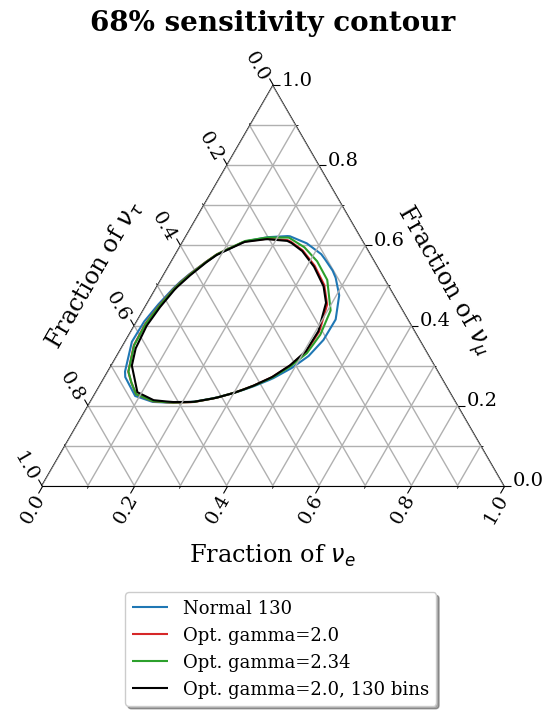

In [28]:
compare_contours( names = ["rect_nostat", "sumstat_4.2", "sumstat_3.6", "sumstat_6.3"], output_name = "all")

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)
/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


rect_nostat
C0
sumstat_6.4_130
C3
rect_nostat
C0
sumstat_6.4_130
C3
sumstat_6.4_80
C2


/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)
/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


rect_nostat
C0
sumstat_6.4_130
C3
sumstat_6.4_80
C2
sumstat_6.4_60
black
rect_nostat
C0
sumstat_6.4_130
C3
sumstat_6.4_80
C2
sumstat_6.4_60
black
sumstat_6.4_40
purple


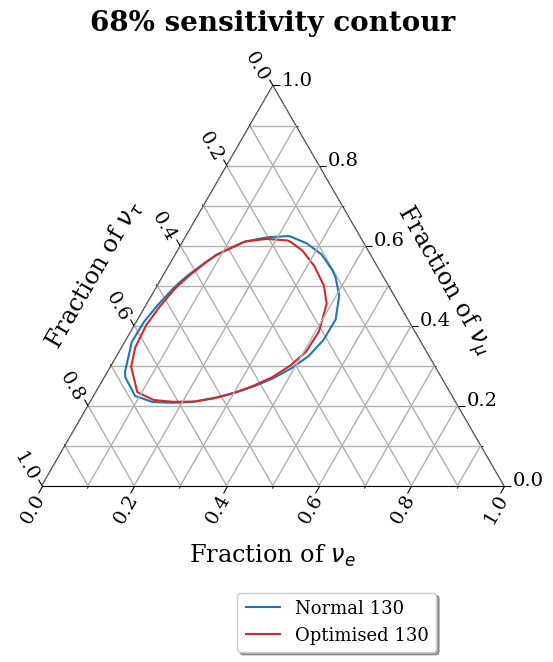

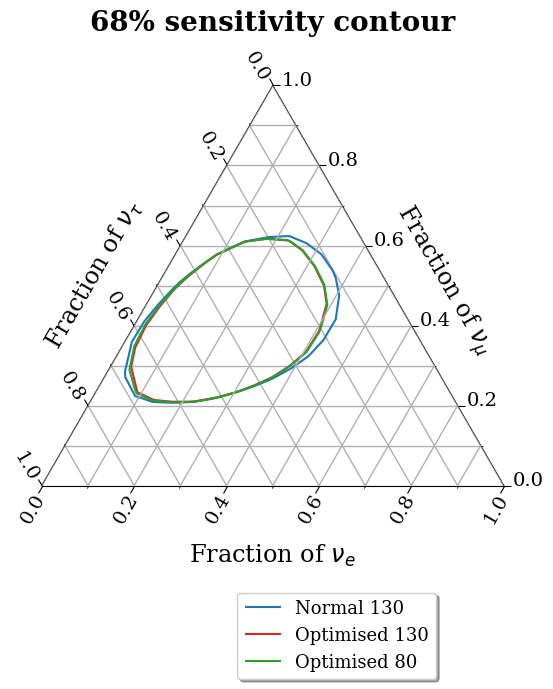

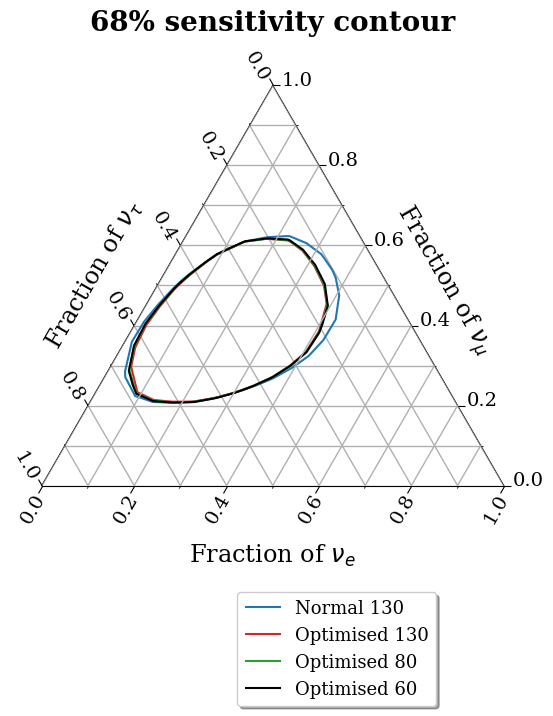

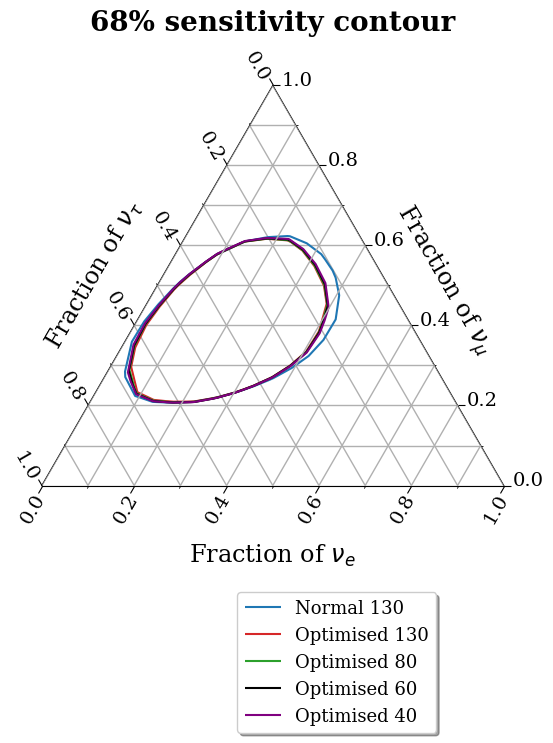

In [29]:
compare_contours( names = ["rect_nostat", "sumstat_6.4_130"], output_name = "130bins")
compare_contours( names = ["rect_nostat", "sumstat_6.4_130", "sumstat_6.4_80"], output_name = "130-80bins")
compare_contours( names = ["rect_nostat", "sumstat_6.4_130", "sumstat_6.4_80", "sumstat_6.4_60"], output_name = "130-60bins")
compare_contours( names = ["rect_nostat", "sumstat_6.4_130", "sumstat_6.4_80", "sumstat_6.4_60", "sumstat_6.4_40"], output_name = "130-40bins")
